### 1. Problem Formulation

From the housing data, investigate:

1) How lower status of population (LSTAT) affects median value (MEDV) of homes?

2) Predit house prices in future given LSTAT predictor.

### 2. Libraries / Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import linear_model
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import RFE 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics

%matplotlib inline

### 3. Load Data

In [2]:
# Load dataset from sklearn.datasets
bd = load_boston()

In [3]:
# Investigate the keys of the dataset
print(bd.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
bd.data # contains the data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
bd.target # contains house prices

In [6]:
bd.feature_names # contains all features or predictor variables

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
bd.DESCR # contains description of the dataset

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
# Load the dataset into a Dataframe

# If you want to load csv without DafaFrame including an index column
# df = pd.DataFrame(bd.data, columns = bd.feature_names, index_col = 0)

df = pd.DataFrame(bd.data, columns = bd.feature_names)
# Response variable 'y' (MEDV) is missing.

In [9]:
# Add response variable (MEDV) to the DataFrame
df['MEDV'] = bd.target

In [10]:
#Check the columns of DataFrame
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
# Save a copy of the DataFrame as csv
df.to_csv(r'housing.csv')

### 4. Data Preprocessing

#### a) Exploratory Data Analysis

##### Number of observations (rows) and features (columns)

In [12]:
# Check the top 5 rows.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# Check the bottom 5 rows.
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [14]:
# Print the shape
print(df.shape)

(506, 14)


##### Number of elements (data values) in each feature

In [15]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### Investigate string values in the numerical columns and replace it with zeros

In [16]:
# isnull() method cannot find string values.
#Check the csv file for any string values other than NaN or NA

##### Investigate null data values in the dataset and replace it with zeros

In [17]:
# Null values = missing values or invalid values like Not a Number (NaN).
df.isnull().sum()
# No null value in the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [18]:
# If there's Null value in any column, replace it with zeros.
# df = df.fillna(0)

In [19]:
# Check weather Null values have been replaced with zeroes.
# df.isnull().sum()

##### Investigate zeroes in the dataset ane replace it with mean, mode or median

In [20]:
# Investigate whether zeroes in the dataset could skew modelling. 
# Zeroes in the column can be replaced by mean, rolling mean, mode, median of
# the respective column.

# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  CRIM  is :  0
Count of zeros in column  ZN  is :  372
Count of zeros in column  INDUS  is :  0
Count of zeros in column  CHAS  is :  471
Count of zeros in column  NOX  is :  0
Count of zeros in column  RM  is :  0
Count of zeros in column  AGE  is :  0
Count of zeros in column  DIS  is :  0
Count of zeros in column  RAD  is :  0
Count of zeros in column  TAX  is :  0
Count of zeros in column  PTRATIO  is :  0
Count of zeros in column  B  is :  0
Count of zeros in column  LSTAT  is :  0
Count of zeros in column  MEDV  is :  0


In [21]:
# Replace each zeroes in columns with the mean value of the respectiv column
# df=df.mask(df==0).fillna(df.mean())

# Here zeroes in'ZN' & 'CHAS' will not be replaced as those values are important
# part of the dataset.

##### Investigate unique values in the dataset

In [22]:
# Query goes through all values in each column, then counts them and then
# lists them.

for column in df:
    unique_values = np.unique(df[column])
    count_unique_values = len(unique_values)
    if count_unique_values < 10:
        print('The number of unique values for features {} :{} -- {}'.format(column, count_unique_values, unique_values))
    else:
        print('The number of unique values for features {} :{}'.format(column, count_unique_values))

The number of unique values for features CRIM :504
The number of unique values for features ZN :26
The number of unique values for features INDUS :76
The number of unique values for features CHAS :2 -- [0. 1.]
The number of unique values for features NOX :81
The number of unique values for features RM :446
The number of unique values for features AGE :356
The number of unique values for features DIS :412
The number of unique values for features RAD :9 -- [ 1.  2.  3.  4.  5.  6.  7.  8. 24.]
The number of unique values for features TAX :66
The number of unique values for features PTRATIO :46
The number of unique values for features B :357
The number of unique values for features LSTAT :455
The number of unique values for features MEDV :229


##### Investigate distribution and relationships

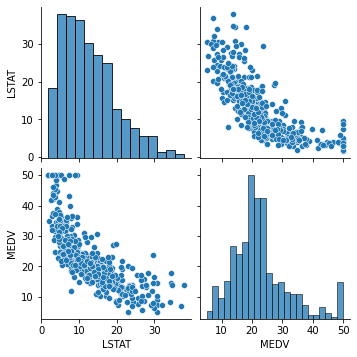

In [23]:
# Visualize the relationships between the predictor variable X (LSTAT) and
# response variable y (MEDV).
sns.pairplot(df[['LSTAT', 'MEDV']])

<AxesSubplot:ylabel='Frequency'>

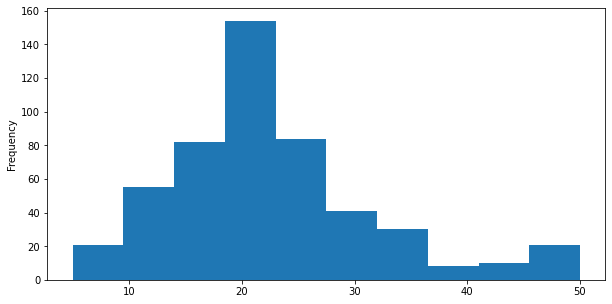

In [24]:
# Visualize histogram for the Response (y) - MEDV
plt.figure(figsize = (10, 5))
df['MEDV'].plot(kind='hist')

#### b) Data Cleaning

In [25]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
# Clean outliers from dataset based on the Response variable (y) = 'MEDV'

# Outliers on the lower side of the 'MEDV'
q_low = df['MEDV'].quantile(0.01)

# Outliers on the higher side of the 'MEDV'
q_hi  = df['MEDV'].quantile(0.99)

# Filter the outliers from the 'MEDV'
df_filtered = df[(df['MEDV'] < q_hi) & (df['MEDV'] > q_low)]

df_filtered

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:ylabel='Frequency'>

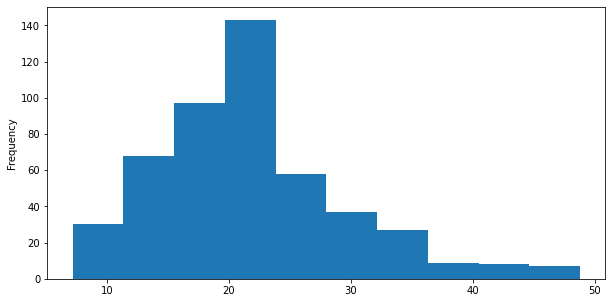

In [27]:
# Visualize histogram again for the Response (y) - MEDV
plt.figure(figsize = (10, 5))
df_filtered['MEDV'].plot(kind='hist')

#### c) Data Aggregation

#### d) Data Join / Merge

#### e) Data Scaling - Normalization / Standardization

#### f) Data Conversion - Numerical / Categorical

#### g) Feature Selection - Correlation / Importance

In [28]:
# Investigate correlation between the Feature (X) and Response variable (y).
cor = df.corr().round(2) # round to two decimal places
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


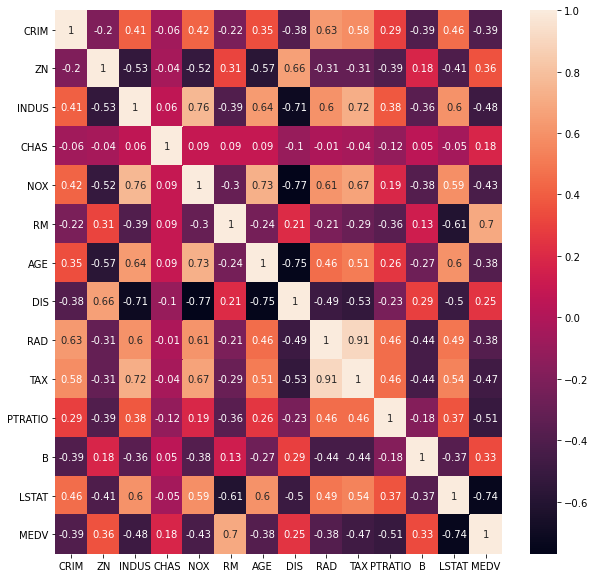

In [29]:
# Investigate correlation in heatmap
fig, ax = plt.subplots(figsize=(10,10))
hm_cor = sns.heatmap(cor, annot = True, annot_kws = {'size' : 10}, ax = ax)

### 5. Select X and y : Hold-out Validation

In [30]:
# Select Response variable 'Prices' (y)
y_select = df_filtered[['MEDV']]
y = y_select.values
y.shape

(484, 1)

Text(0.5, 1.0, 'Visualizing Profit outliers')

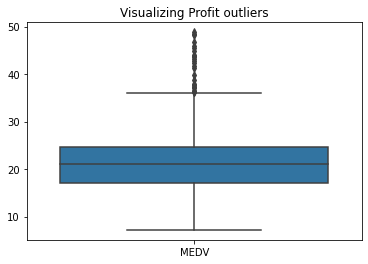

In [31]:
# Visualizing 'Prices' outliers using boxplot
sns.boxplot(data = df_filtered[['MEDV']])
plt.title('Visualizing Profit outliers')

In [32]:
# Select Feature variable 'Marketing Spend' (X)
X_select = df_filtered[['LSTAT']]
X = X_select.values
X.shape

(484, 1)

Text(0.5, 1.0, 'Visualizing LSTAT outliers')

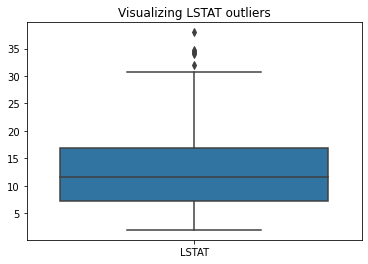

In [33]:
# Visualizing 'LSTAT' outliers using boxplot
sns.boxplot(data = df_filtered[['LSTAT']])
plt.title('Visualizing LSTAT outliers')

Text(0.5, 1.0, 'LSTAT Vs MEDV Scatterplot')

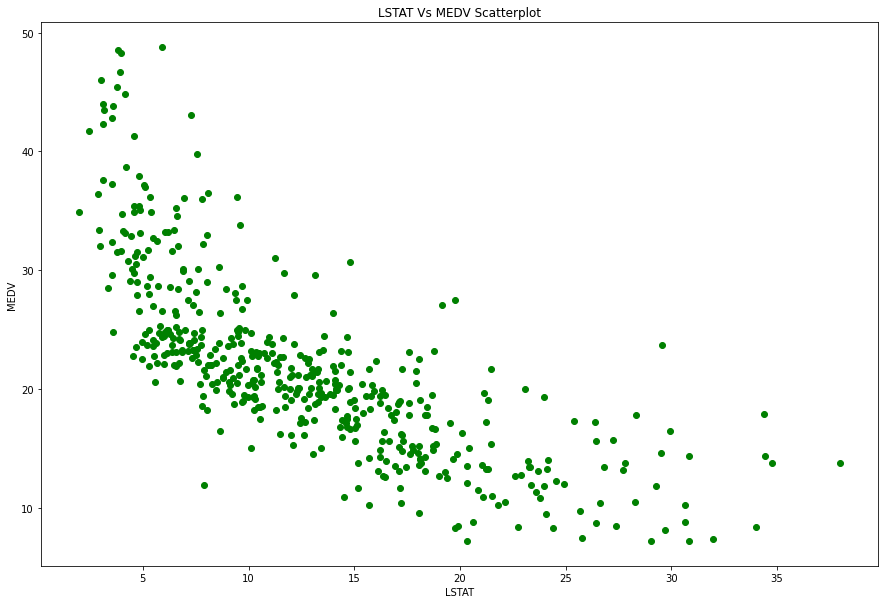

In [34]:
# Visualise LSTAT - MEDV scatterplot
plt.figure(figsize=(15,10))
plt.scatter(df_filtered[['LSTAT']], df_filtered[['MEDV']], c='green')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT Vs MEDV Scatterplot')

#Observation: Prices (MEDV) decreases as LSAT increases. The relationship appears
# quadratic.

### 6. Data Split for Training

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [36]:
# Train and test data shape
print(X_train.shape) # 80% data
print(X_test.shape)  # 20% data
print(y_train.shape) # 80% data
print(y_test.shape)  # 20% data

(387, 1)
(97, 1)
(387, 1)
(97, 1)


### 7. Modelling Data - Build Data Model

#### Modelling a linear regression

In [37]:
# Initialize an instance of Linear Regression model.
lm = LinearRegression(fit_intercept = True)  

In [38]:
# Fit the linear regression model to the data. Use 'X' and then 'y'.
model_lm = lm.fit(X_train, y_train)

In [39]:
# model coeffiencint
model_lm.coef_

array([[-0.81683534]])

In [40]:
# model intercept
model_lm.intercept_

array([32.34776454])

In [41]:
# Ask the model to predict.
# Pass the testing data which has the input values.
y_predictions_test_lm = model_lm.predict(X_test)
y_predictions_train_lm = model_lm.predict(X_train)

In [42]:
# Show test predictions
y_predictions_test_lm [0:10]

array([[28.23091442],
       [12.6783695 ],
       [25.28213883],
       [22.56207714],
       [21.45118108],
       [18.79646621],
       [24.96357305],
       [26.9893247 ],
       [20.56083055],
       [21.36949754]])

In [43]:
# Show train predictions
y_predictions_train_lm [0:10]

array([[20.07072935],
       [16.81972468],
       [20.78954445],
       [21.36132919],
       [22.26801642],
       [12.28628853],
       [12.42515054],
       [20.25043312],
       [21.69623168],
       [11.28158106]])

In [44]:
# Show all test predictions
print(y_predictions_test_lm)
type(y_predictions_test_lm)

[[28.23091442]
 [12.6783695 ]
 [25.28213883]
 [22.56207714]
 [21.45118108]
 [18.79646621]
 [24.96357305]
 [26.9893247 ]
 [20.56083055]
 [21.36949754]
 [25.31481225]
 [14.28753512]
 [18.33903842]
 [22.32519489]
 [21.99846076]
 [27.99403217]
 [22.13732276]
 [21.19796212]
 [28.6720055 ]
 [18.9925067 ]
 [24.68584903]
 [29.23562189]
 [29.91359522]
 [28.90888775]
 [23.70564662]
 [26.69526397]
 [27.79799169]
 [24.0242124 ]
 [28.41061819]
 [22.44772019]
 [14.93283504]
 [15.01451858]
 [16.52566396]
 [12.61302267]
 [25.16778188]
 [29.43166237]
 [24.05688582]
 [24.08955923]
 [19.09052694]
 [26.35219313]
 [26.05813241]
 [29.62770285]
 [26.02545899]
 [22.2190063 ]
 [10.74246974]
 [17.05660693]
 [ 6.21720194]
 [17.36700436]
 [20.25860148]
 [22.95415811]
 [23.46876437]
 [18.54324726]
 [22.43138349]
 [ 7.33626636]
 [28.02670558]
 [16.40313866]
 [26.2705096 ]
 [29.01507635]
 [14.82664645]
 [29.46433579]
 [19.9563724 ]
 [24.92273128]
 [26.13981594]
 [27.86333851]
 [16.10907794]
 [13.36451119]
 [15.17788

numpy.ndarray

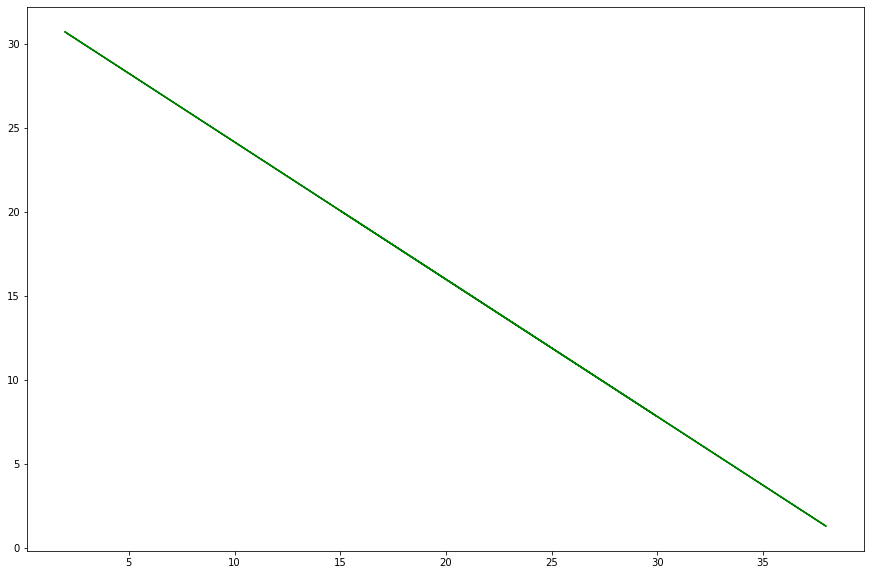

In [45]:
# Visualizing linear regression plot on predicted training data and comparing 
# it to scatter plot of original training data set.
plt.figure(figsize=(15,10))
plt.plot(X_train, y_predictions_train_lm, color="green", label="linear regression")
#plt.scatter(X_train, y_train, c='green')
plt.show()

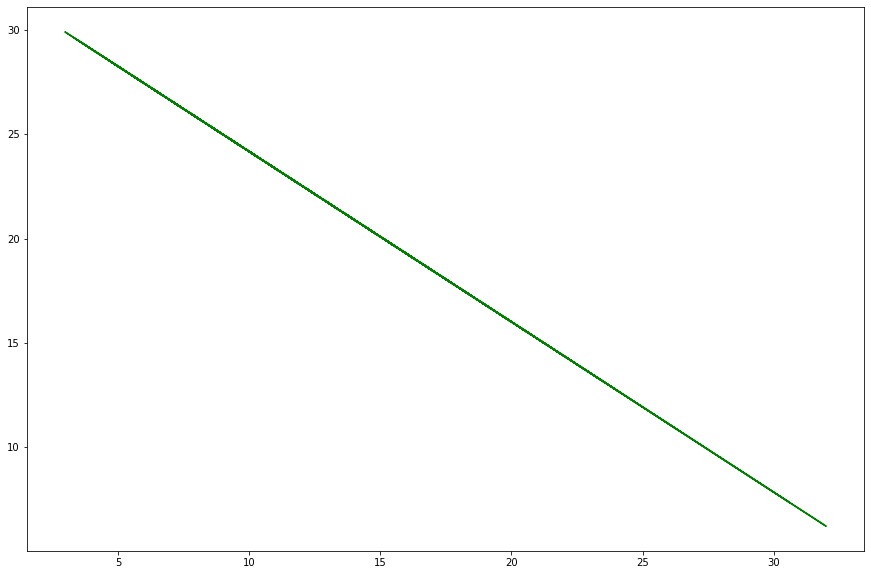

In [46]:
# Visualizing linear regression plot on predicted testing data and comparing 
# it to scatter plot of original testing data set.
plt.figure(figsize=(15,10))
plt.plot(X_test, y_predictions_test_lm, color="green", label="linear regression")
#plt.scatter(X_test, y_test, c='green')
plt.show()

#### Modelling polynomial regression

In [47]:
pm = PolynomialFeatures(degree = 2)
X_train_poly = pm.fit_transform(X_train)
X_test_poly = pm.fit_transform(X_test)
#model_pm = pm.fit(X_train_poly, y_train)

In [48]:
# Initialize an instance of Linear Regression model.
lm_pm = LinearRegression(fit_intercept = True)  

In [49]:
# Fit the linear regression model to the data. Use 'X_poly' and then 'y_train'.
model_lm_pm = lm_pm.fit(X_train_poly, y_train)

In [50]:
# model coeffiencint
model_lm_pm.coef_

array([[ 0.        , -2.02199453,  0.03747253]])

In [51]:
# model intercept
model_lm_pm.intercept_

array([39.79621611])

In [52]:
# Ask the model to predict.
# Pass the testing data which has the input values.
y_predictions_test_lm_pm = model_lm_pm.predict(X_test_poly)
y_predictions_train_lm_pm = model_lm_pm.predict(X_train_poly)

In [53]:
# Show test predictions
y_predictions_test_lm_pm [0:10]

array([[30.55722584],
       [12.83489844],
       [25.10975165],
       [20.95079386],
       [19.4912553 ],
       [16.56481959],
       [24.5797005 ],
       [28.14450976],
       [18.42154847],
       [19.38940728]])

In [54]:
# Show test predictions
y_predictions_train_lm_pm [0:10]

array([[17.87071616],
       [14.89992609],
       [18.68783677],
       [19.3792637 ],
       [20.55095531],
       [12.73921968],
       [12.7711311 ],
       [18.0695553 ],
       [19.80129607],
       [12.57285882]])

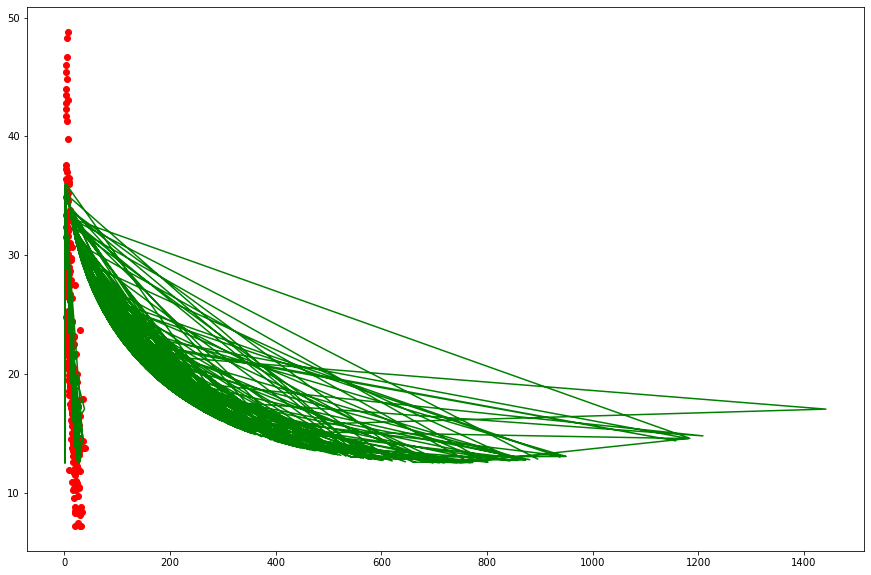

In [55]:
# Visualizing polynomial regression plot on predicted training data and comparing 
# it to scatter plot of original training data set.
plt.figure(figsize=(15,10))
plt.plot(X_train_poly, y_predictions_train_lm_pm, color="green", label="poly regression")
plt.scatter(X_train, y_train, c='red')
plt.show()

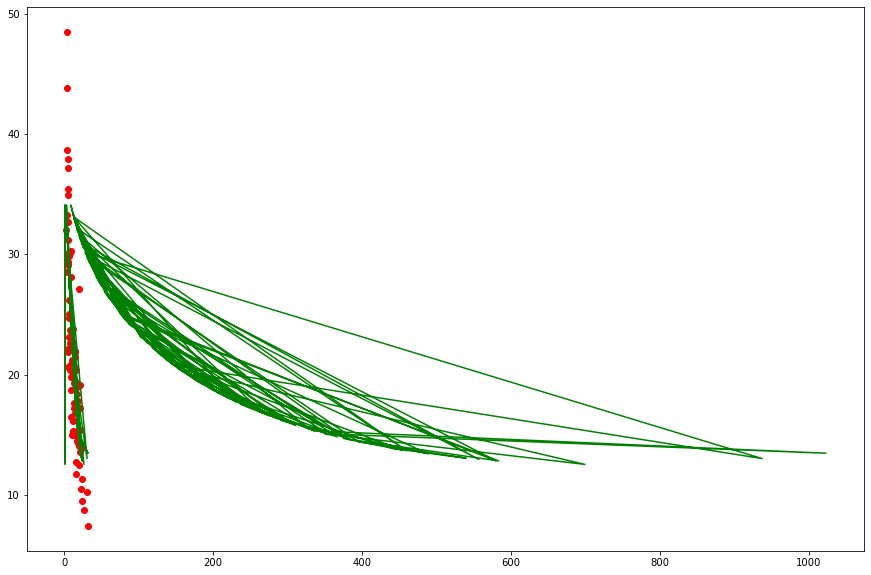

In [56]:
# Visualizing polynomial regression plot on predicted test data and comparing 
# it to scatter plot of original test data set.
plt.figure(figsize=(15,10))
plt.plot(X_test_poly, y_predictions_test_lm_pm, color="green", label="poly regression")
plt.scatter(X_test, y_test, c='red')
plt.show()

### 8. Model Evaluation - polynomial model

In [57]:
# Coeffiencient of determination R^2 of the prediction from sklearn.
# Train data
print('The accuracy of the model on training data set is :', r2_score(y_train, y_predictions_train_lm_pm))

The accuracy of the model on training data set is : 0.6390490262634524


In [58]:
# Coeffiencient of determination R^2 of the prediction from sklearn.
# Test data
print('The accuracy of the model on training data set is :', r2_score(y_test, y_predictions_test_lm_pm))

The accuracy of the model on training data set is : 0.6910288250670618


In [59]:
#The R Square is measure of how close the data are to the fitted regression line.
# Our model explains 63% of the training data & 69% of the testing data.

In [60]:
print('The RMSE on training data set is :' ,np.sqrt(mean_squared_error(y_train, y_predictions_train_lm_pm)))

The RMSE on training data set is : 4.639082377568634


In [61]:
print('The RMSE on testing data set is :' ,np.sqrt(mean_squared_error(y_test, y_predictions_test_lm_pm)))

The RMSE on testing data set is : 4.2466280564538605


In [62]:
# The RMSE is the standard deviation of the residuals. Residuals is 
# the difference between the predicted value and the regression line. 
# Hence RMSE is a measure of how spread your residuals are.

# The Root Mean Squared Error measures the average error the model makes
# in predicting the outcome. Smaller the value of RMSE, better the model is.
# With high numbers, model needs to be improved.

In [63]:
# The mean absolute error (MAE) is the average of all the absolute errors. 
# The absolute error is the difference between the true value (y_train) 
# and the predicted value (y_pred).

# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_predictions_train_lm_pm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,y_predictions_test_lm_pm))

The MAE  on the training dataset is:  3.50477629596245
The MAE  on the testing dataset is:  3.2247727846398724


Text(0.5, 1.0, 'Actual Vs Predicted Values')

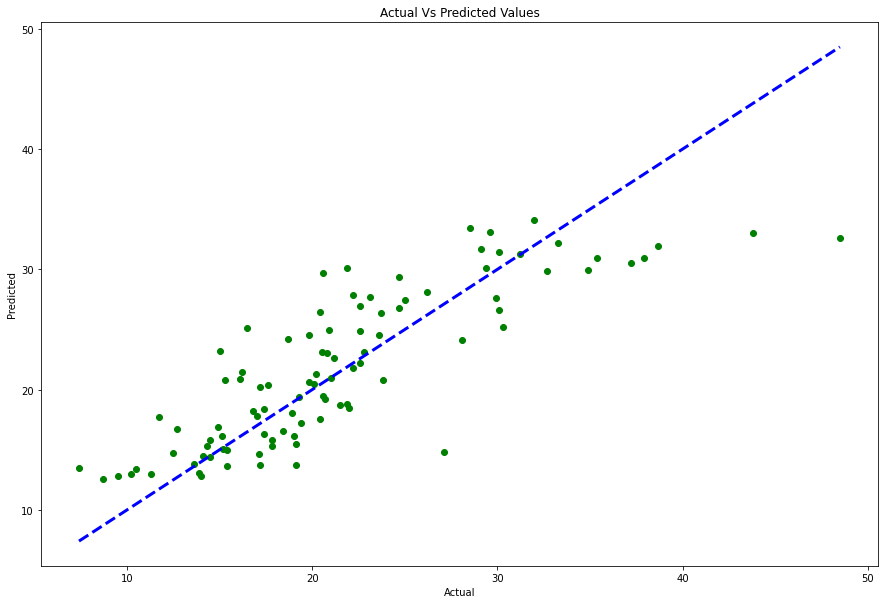

In [64]:
# Visualise train and test data using Scatter plot.
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predictions_test_lm_pm, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c='blue', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted Values')

C:\Users\Sagewood\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Predicted')

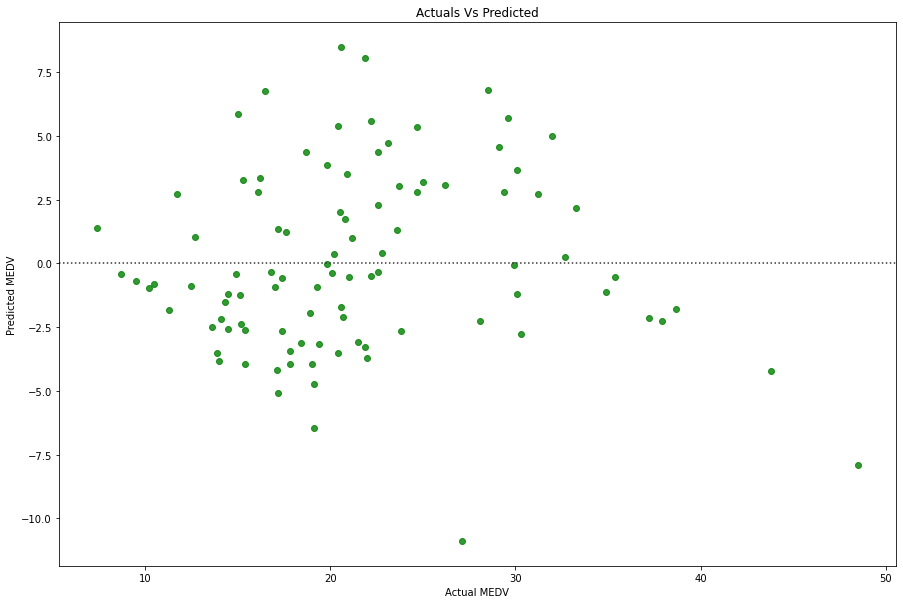

In [65]:
# Plotting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_test, y_predictions_test_lm_pm, color='green')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actuals Vs Predicted')

In [66]:
type(X_test) # Is an array. Pass the column name and convert into DataFrame.

numpy.ndarray

In [67]:
X_test.shape

(97, 1)

In [68]:
# Create a DataFrame to show actual Vs predicted values of our test data set.
avp_df = pd.DataFrame(X_test, columns = ['LSTAT'])
avp_df['MEDV Actual'] = y_test
avp_df['MEDV Predicted'] = y_predictions_test_lm_pm
avp_df['Difference'] = y_test - y_predictions_test_lm_pm

In [69]:
# Show avp_df DataFrame
avp_df[0:20]

,LSTAT,MEDV Actual,MEDV Predicted,Difference
0,5.04,37.2,30.557226,6.642774
1,24.08,9.5,12.834898,-3.334898
2,8.65,16.5,25.109752,-8.609752
3,11.98,21.0,20.950794,0.049206
4,13.34,20.6,19.491255,1.108745
5,16.59,18.4,16.564820,1.835180
6,9.04,23.6,24.579700,-0.979700
7,6.56,26.2,28.144510,-1.944510
8,14.43,17.4,18.421548,-1.021548
9,13.44,19.3,19.389407,-0.089407


In [70]:
# Save acutal vs predicted DataFrame to a csv. 'r' is for raw data.
avp_df.to_csv(r'actual_vs_predicted.csv')

### 9. Final Model

#### Creating model coefficient DataFrame

In [71]:
# model intercept
model_lm_pm.intercept_

array([39.79621611])

In [72]:
model_lm_pm.coef_

array([[ 0.        , -2.02199453,  0.03747253]])

In [73]:
# Investigate the model coefficients
print (pm.powers_) # Shows:
# [[0] ---------x^0...b1
#  [1]..........x^1...b2
#  [2]..........x^2...b3  

[[0]
 [1]
 [2]]


In [74]:
# Assigning model coefficient (b0)

coef = model_lm_pm.coef_
coef # Do not need reshaping as output is in (1,1) format.


# Creating a 2nd order quadratic Dataframe - b1x1 + b2x2 + b3x1^2 + b4x2^2 + b5x1x2 + error
coef_df = pd.DataFrame(coef, columns = ['b1', 'b2', 'b3'])


# Displayinng DataFrame
coef_df


,b1,b2,b3
0,0.0,-2.021995,0.037473


#### Creating a function from the model and predicting

In [75]:
# Declaring function features
LSTAT = 5.04

# Regression Formula for pred
# y =  model intercept + b1 + b2X^1 + b3X^2
# Where y = House prices.

# Prediction Calculator
MEDV_prediction = (model_lm_pm.intercept_) + (coef_df[['b1']].values[0]) + (coef_df[['b2']].values[0] * LSTAT) + (coef_df[['b3']].values[0] * LSTAT**2)


print('The predicted MEDV is: ', MEDV_prediction)

The predicted MEDV is:  [30.55722584]


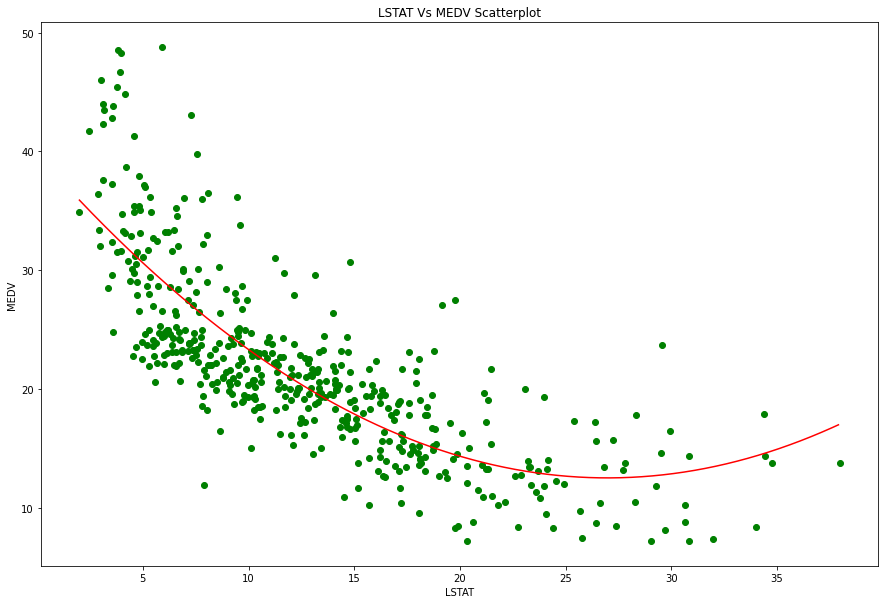

In [76]:
# Visualise LSTAT - MEDV scatterplot in relationship to predictions from the 
# polynomial regression model.

plt.figure(figsize=(15,10))

# Plot scatter plot LSTAT - MEDV
plt.scatter(df_filtered[['LSTAT']], df_filtered[['MEDV']], c='green')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT Vs MEDV Scatterplot')

# plot predictions from the polynomial regression model
# defining x-axis values array from 2 to 38, spaced at 0.1 interval
x_axis = np.arange(2, 38, 0.1)
# y_axis is same as MEDV_prediction from above but tailored ot x_axis values
y_axis = (model_lm_pm.intercept_) + (coef_df[['b1']].values[0]) + (coef_df[['b2']].values[0] * x_axis) + (coef_df[['b3']].values[0] * x_axis**2)
plt.plot(x_axis, y_axis, color = 'r')
plt.show()

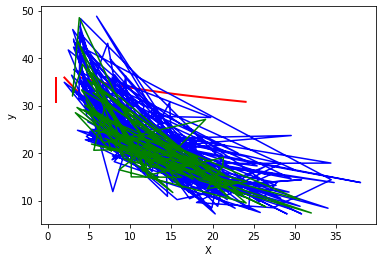

In [88]:
# Another way to investigate whether the model fits

# defining x-axis values array from 2 to 38, spaced at 0.1 interval
#x_axis = np.arange(2, 40, 0.1)
x_axis = np.arange(2, 5, 0.1).reshape(30, 1)
#x_axis = np.linspace(2, 5, 200).reshape(200,1)

# fit_transform x_axis values
X_axis_poly = pm.fit_transform(x_axis)

# preditions for X_axis_poly
y_predictions_poly_lm_pm = model_lm_pm.predict(X_axis_poly)

# plot preditions
plt.plot(X_axis_poly, y_predictions_poly_lm_pm, "r", linewidth = 2, label = "Predictions")

# plot training data
plt.plot(X_train, y_train, "b", label = "Training points")

# plot testing data
plt.plot(X_test, y_test, "g", label = "Testing points")

plt.xlabel("X")
plt.ylabel("y")
plt.show()

### 10. Deploy Model